# 分析①


## データハンドリング入門：夏目漱石『夢十夜』の分析

+ データハンドリング
+ 単語の頻度の集計
+ TF-IDF


In [1]:
# ライブラリの読み込み
library('dplyr')
library('stringr')
library('RMeCab')


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


You need 64 bit version of MeCab for Winndows, with UTF8 dictionary
Dowlnload it from 'https://github.com/ikegami-yukino/mecab/releases'



In [2]:
getwd()

[1] "C:/Users/satoc/Documents/GitHub/lecture2022shimane"

In [3]:
yume = read.delim('data/textmining/yumejuya.tsv', header=T, sep='\t', stringsAsFactors=F, fileEncoding='utf8')

+ section: 第一夜から第十夜までが数字で
+ paragraph: 各話の段落番号
+ content: 本文


In [4]:
yume %>% head()

,section_id,paragraph_id,content
,<int>,<int>,<chr>
1,1,1,こんな夢を見た。
2,1,2,腕組をして枕元に坐っていると、仰向に寝た女が、静かな声でもう死にますと云う。女は長い髪を枕に敷いて、輪郭の柔らかな瓜実顔をその中に横たえている。真白な頬の底に温かい血の色がほどよく差して、唇の色は無論赤い。とうてい死にそうには見えない。しかし女は静かな声で、もう死にますと判然云った。自分も確にこれは死ぬなと思った。そこで、そうかね、もう死ぬのかね、と上から覗き込むようにして聞いて見た。死にますとも、と云いながら、女はぱっちりと眼を開けた。大きな潤のある眼で、長い睫に包まれた中は、ただ一面に真黒であった。その真黒な眸の奥に、自分の姿が鮮に浮かんでいる。
3,1,3,自分は透き徹るほど深く見えるこの黒眼の色沢を眺めて、これでも死ぬのかと思った。それで、ねんごろに枕の傍へ口を付けて、死ぬんじゃなかろうね、大丈夫だろうね、とまた聞き返した。すると女は黒い眼を眠そうに※たまま、やっぱり静かな声で、でも、死ぬんですもの、仕方がないわと云った。
4,1,4,じゃ、私の顔が見えるかいと一心に聞くと、見えるかいって、そら、そこに、写ってるじゃありませんかと、にこりと笑って見せた。自分は黙って、顔を枕から離した。腕組をしながら、どうしても死ぬのかなと思った。
5,1,5,しばらくして、女がまたこう云った。
6,1,6,「死んだら、埋めて下さい。大きな真珠貝で穴を掘って。そうして天から落ちて来る星の破片を墓標に置いて下さい。そうして墓の傍に待っていて下さい。また逢いに来ますから」


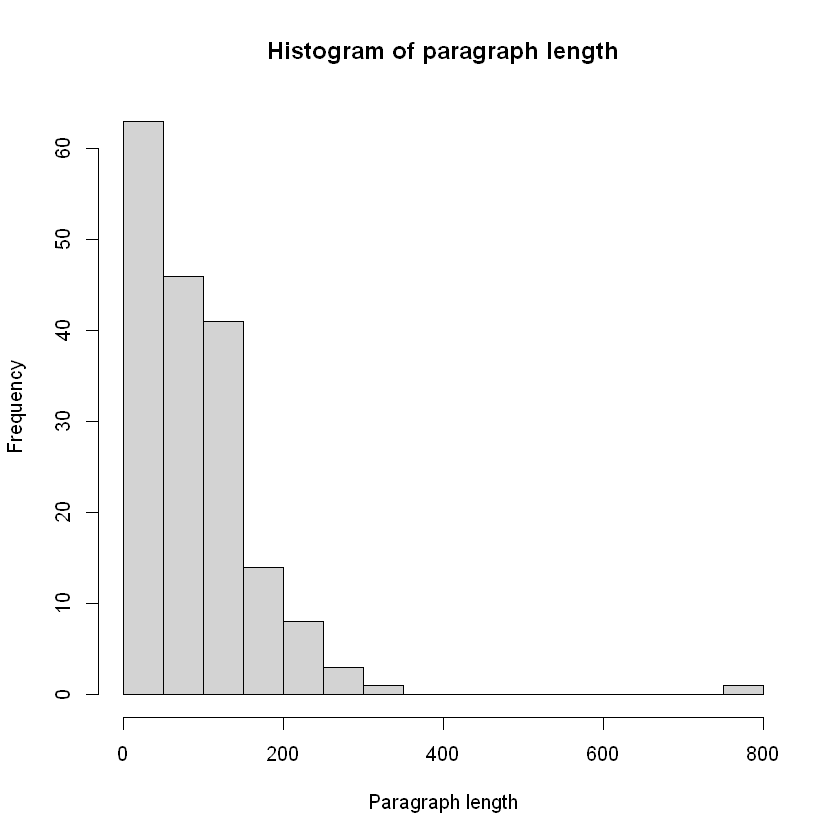

In [5]:
# 段落の長さの分布
# str_lengt: 文字列の長さ
yume[, 'content'] %>% str_length() %>% hist(breaks=25, xlab='Paragraph length', main='Histogram of paragraph length')

In [6]:
# 各話ごとの段落の長さの分布を箱ひげ図で可視化する
# 段落の長さを格納する
yume['length'] = yume[, 'content'] %>% str_length()

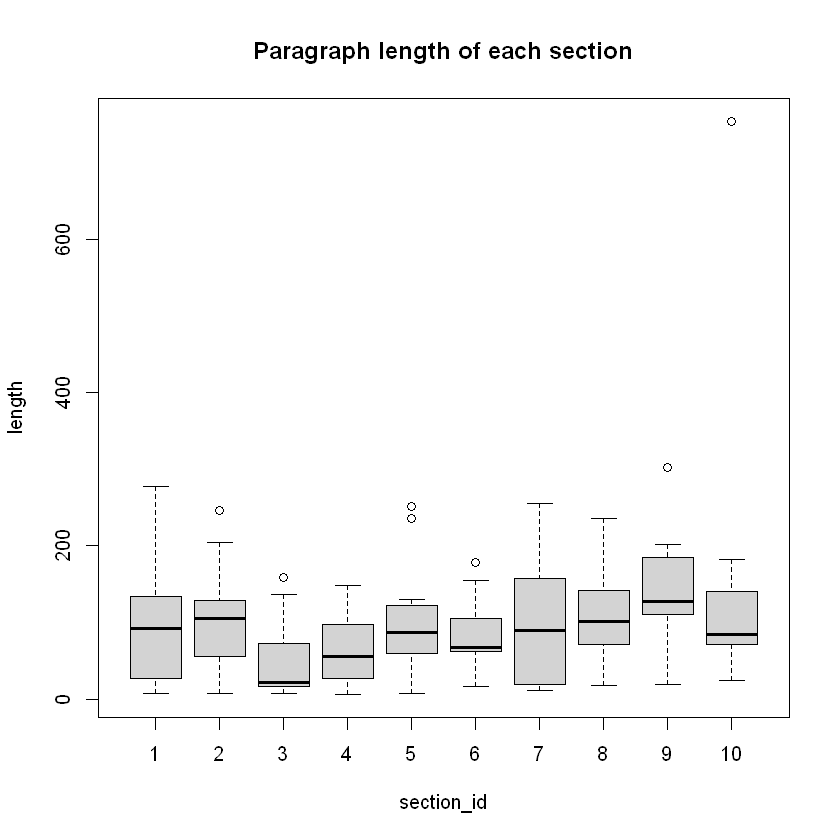

In [7]:
boxplot(length ~ section_id, data=yume, main='Paragraph length of each section')

In [8]:
# 分析のため各話ごとに文章を結合する
# group_by: データを集約する
# summarise: データを特定の関数でまとめる
sections = yume %>% group_by(section_id) %>% summarise(text = paste0(content, collapse=''))
sections = as.data.frame(sections)


In [9]:
# データの形状を確認する
dim(sections)

[1] 10  2

In [10]:
colnames(sections)

[1] "section_id" "text"

In [11]:
# 各夜の長さ
sections[, 'text'] %>% str_length() 

[1] 1753 1564 1516 1532 1411 1603 1462 1678 1591 1727

In [12]:
# docMatrixDF: dataframeから単語を抽出

count_noun = docMatrixDF(sections[,'text'], pos=c('名詞'))

to make data frame



In [13]:
count_noun %>% head()

,ROW.1,ROW.2,ROW.3,ROW.4,ROW.5,ROW.6,ROW.7,ROW.8,ROW.9,ROW.10
あすこ,0,0,1,0,0,0,0,0,0,0
あたり,1,0,0,0,0,0,1,0,0,0
あっち,0,0,0,1,0,0,0,0,2,0
あなた,1,0,0,0,0,0,0,0,0,0
あれ,0,0,0,0,0,1,0,0,0,0
いくつ,1,0,0,3,0,0,0,0,0,0


In [14]:
# 全体を集計する
freq_noun = count_noun %>% rowSums()

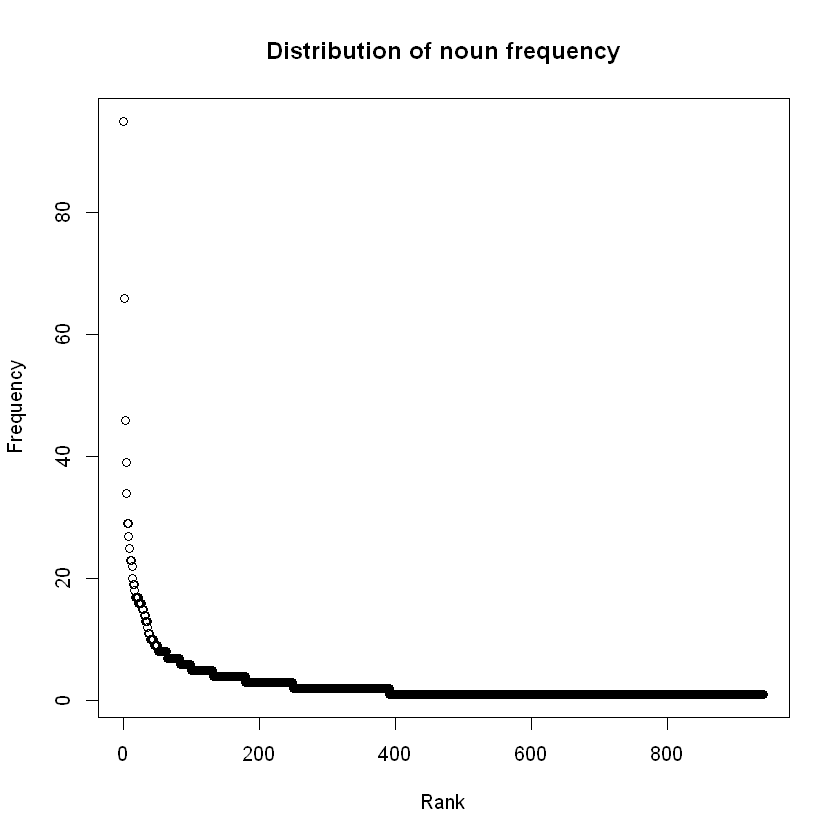

In [15]:
# 全体を集計する
freq_noun %>% sort(decreasing=T) %>% plot(main='Distribution of noun frequency', xlab='Rank', ylab='Frequency')

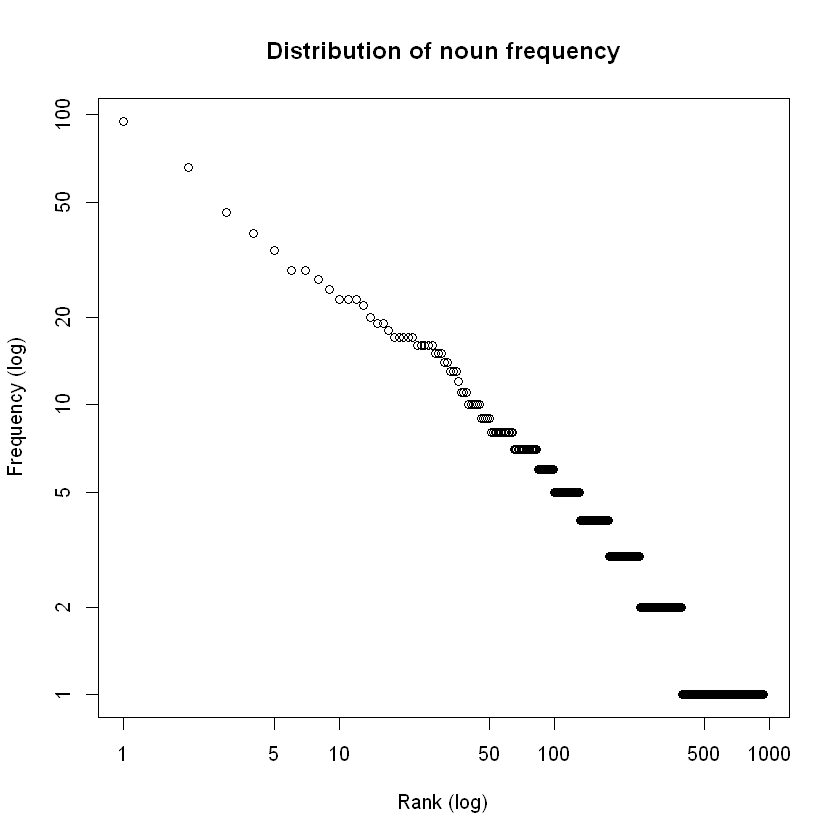

In [16]:
freq_noun %>% sort(decreasing=T) %>% plot(main='Distribution of noun frequency', xlab='Rank (log)', ylab='Frequency (log)', log='xy')

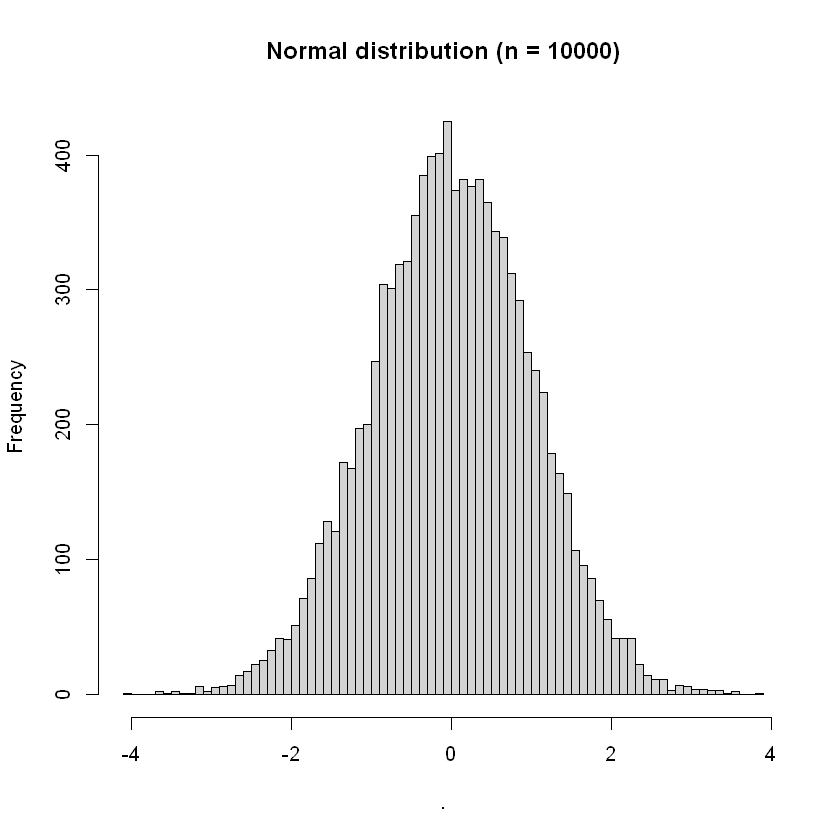

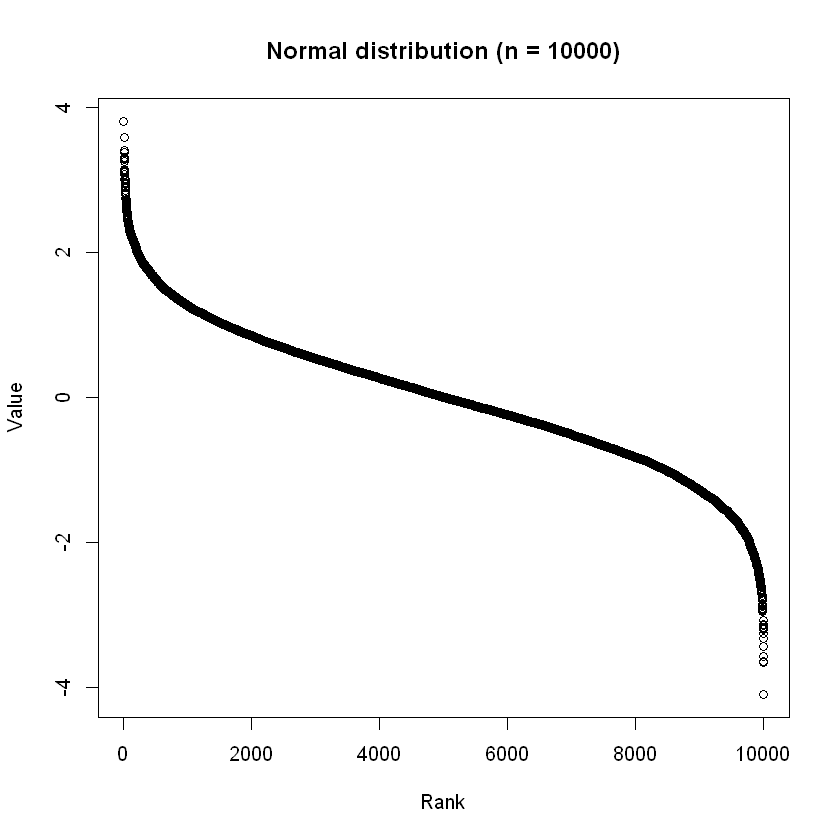

In [17]:
# cf. Noraml Distribution
dist = rnorm(10000)
dist %>% hist(100, main='Normal distribution (n = 10000)')
dist %>% sort(decreasing=T) %>% plot(main='Normal distribution (n = 10000)', xlab='Rank', ylab='Value')

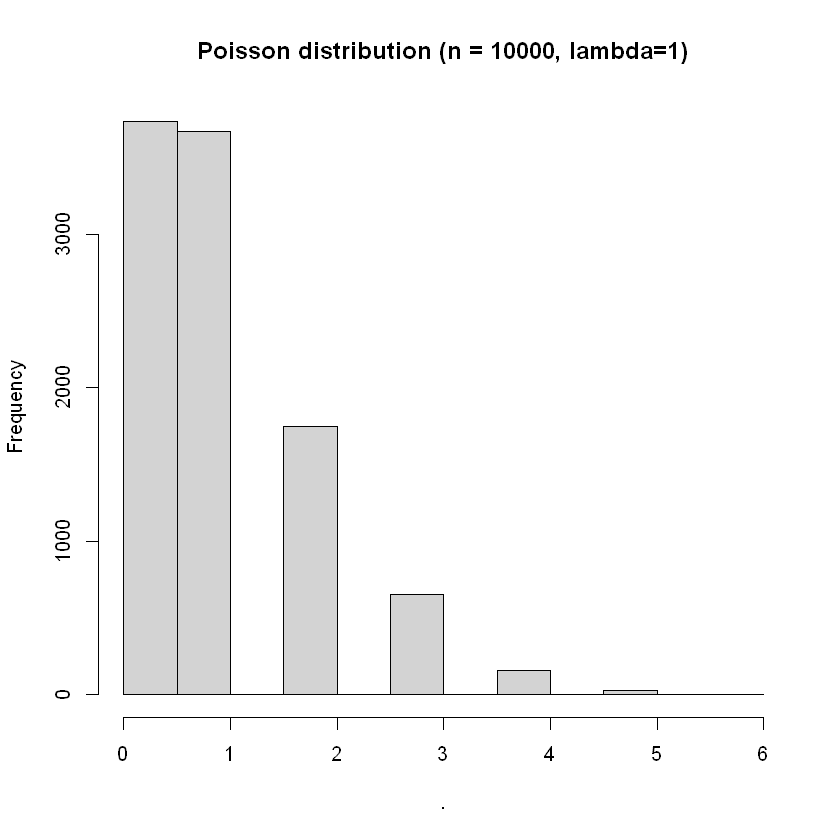

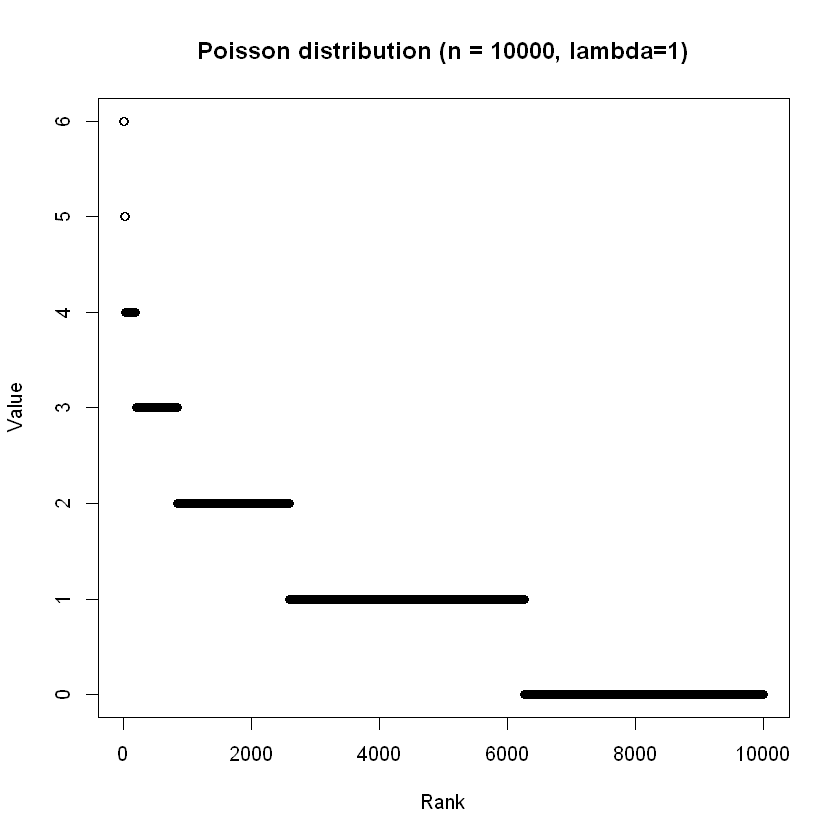

In [18]:
# cf. Poisson Distribution
dist = rpois(10000, 1) 
dist %>% hist(main='Poisson distribution (n = 10000, lambda=1)')
dist %>% sort(decreasing=T) %>% plot(main='Poisson distribution (n = 10000, lambda=1)', xlab='Rank', ylab='Value')

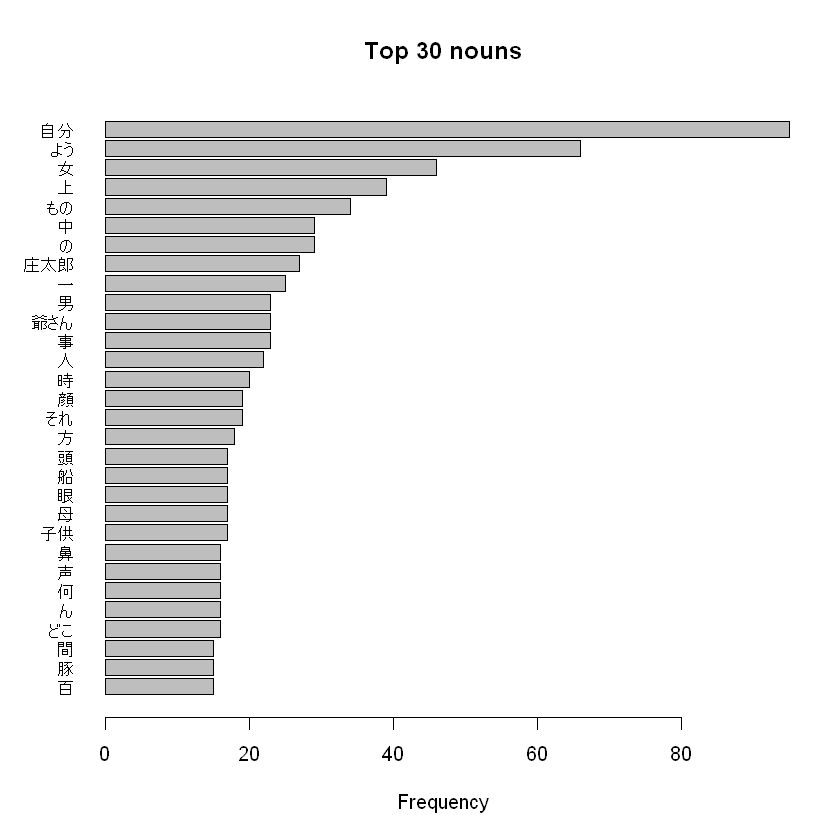

In [28]:
freq_noun %>% sort() %>% tail(30) %>% barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency', cex.names=0.9)

In [20]:
# stopwords
stopwords = c('よう', '上', '中',  'もの', 'の', 'それ', '一', '事', '何','ん', 'どこ')

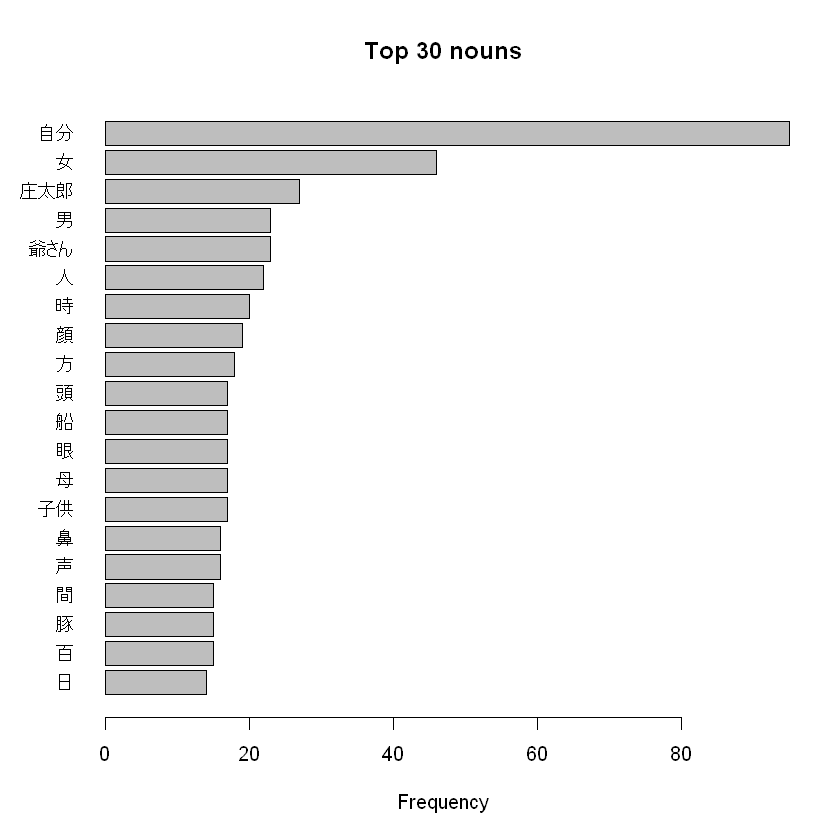

In [21]:
# tableなので以下の書き方にする
freq_noun[!names(freq_noun) %in% stopwords] %>% 
    sort() %>% 
    tail(20) %>% 
    barplot(horiz=T, las=1, main='Top 30 nouns', xlab='Frequency')

### TF-IDF

$$
TF_{i,j} = \frac{n_{i,j}}{\sum{_{k}n_{k,j}}} = \frac{文書 d_j における単語 t_i  の頻度}{文書d中の総単語数}
$$

$$
IDF{i,j} = \log{\frac{|D|}{|{d:d \ni t_i}|}} = \log{(1 / \frac{ 単語t_iを含む文書数}{ 総文書数})}
$$

$$
TFIDF_{i,j} = TF_{i,j} \times IDF_{i,j}
$$


In [22]:
# tf, idfをそれぞれ求める関数

tf = function(df){
    return(t(t(df) / colSums(df)))
}

idf = function(df){
    doc_sums = (df > 0) %>% rowSums() + 1
    return(log2(ncol(df)/doc_sums))
}

In [23]:
count_noun %>% head()

,ROW.1,ROW.2,ROW.3,ROW.4,ROW.5,ROW.6,ROW.7,ROW.8,ROW.9,ROW.10
あすこ,0,0,1,0,0,0,0,0,0,0
あたり,1,0,0,0,0,0,1,0,0,0
あっち,0,0,0,1,0,0,0,0,2,0
あなた,1,0,0,0,0,0,0,0,0,0
あれ,0,0,0,0,0,1,0,0,0,0
いくつ,1,0,0,3,0,0,0,0,0,0


In [24]:
tfidf= tf(count_noun) * idf(count_noun) 

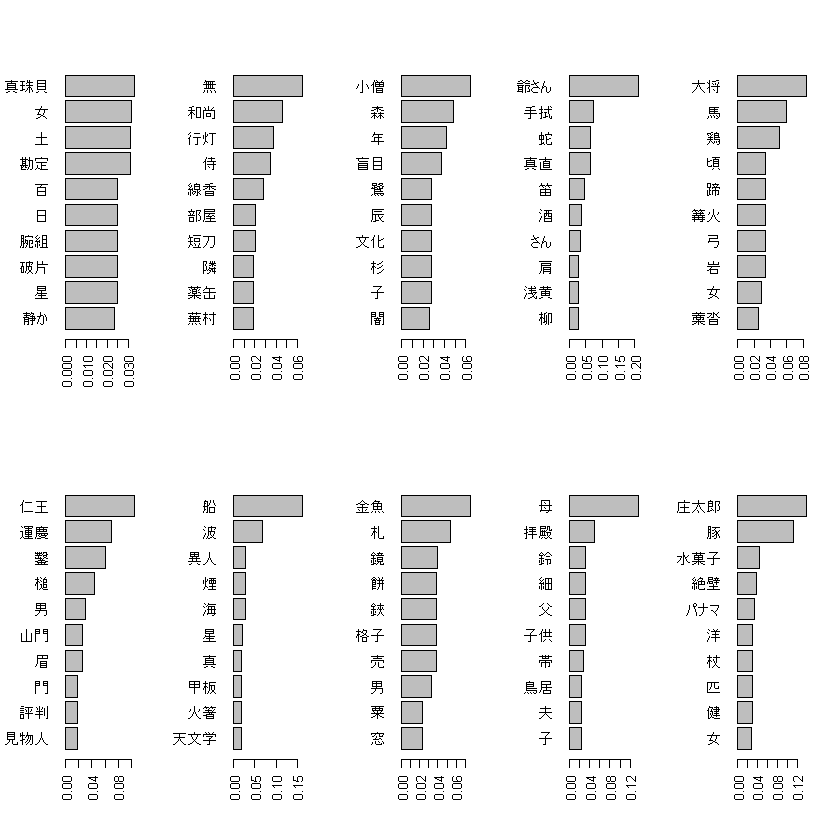

In [25]:
par(mfrow=c(2,5)) 

for(i in 1:10){
tfidf[,i] %>% 
    sort() %>% 
    tail(10)  %>%  barplot(horiz=T, las=2, main=character(i))
}


In [26]:
# 図表設定を初期化
par(mfrow=c(1,1)) 